# Project 5
Author: Tommy Phung <br>
Target: Video Game Invenstors

In [1]:
import pandas as pd
from functions import data_cleaning as dc 

In [2]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)

## Data Preperations

Before analysising the dataset, it needs to be cleaned for any missing data or any data that isn't needed for the project. <br>
Unnecessary columns are removed from the dataset that would not be used. **Wishlist, Playing and Backlog** are the number of people that want the game, is currently playing or planning on playing the selected game. This is subjective and doesn't indicate whether the game is good or bad. The column Plays, which are people that have played the game can give insight on actual players for the game. <br>

**TBD or To Be Determined** are games with not release date yet meaning that the game is too new to be analysis yet. 
Any duplicates are also removed. A thing to note is that games get rereleases so duplicates in titles are handled differently. 

The number of players in the columns **Plays and Reviews** are changed to integers for comparison. The letter **K**, stands for the thousands and changed accordingly. 

In [3]:
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists'], axis = 1, inplace= True)
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)
df.drop_duplicates(inplace= True)    ### 

df['Plays'] = df['Plays'].apply(dc.value_to_float)
df['Reviews'] = df['Reviews'].apply(dc.value_to_float)

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))

df.drop(df[df.Release_Date > 2023].index, inplace= True)
df.drop(df[df.Release_Date < 1990].index, inplace= True)
df.drop(df[df.Rating.isna()].index, inplace= True)

## Data Distribution

While looking at the dataset, there is a couple of things to note in the distribution. For the number of ratings, it follows a normal distribution not including that the number of games that doesn't have a rating. 

**16.6 %** of the games were a developers **single game**. This could be misleading as some **developers changes names** or get **absorbed by companies** that would change what the game developers havppens to be. We would assume that this doesn't make a majority of games for now unless the number of games makes an impact. <br>
**15.1 %** of the games **doesn't have a game developer listed**. There is a number of reason other than missing developer name. **Newer unknown games** would have individual name rather than actual company name. This could be good to note the potential of these games since **not all good games are known or created by big companies.** 


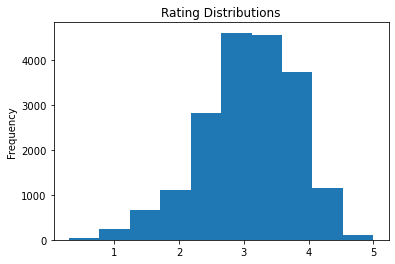

In [4]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);


In [5]:
GOTY_df = pd.read_excel('datasets/Sample GOTY.xlsx')

In [6]:
GOTY_df

,Year,Game,Genre,Developer(s)
0,1998,GoldenEye 007,First-person shooter,Rare
1,1999,The Legend of Zelda: Ocarina of Time,Action-adventure,Nintendo EAD
2,2000,MediEvil 2,Action-adventure,SCE Cambridge Studio
3,2000,Pokémon Yellow,Role-playing,Game Freak
4,2000,Deus Ex,Action role-playing,Ion Storm
5,2001,Gran Turismo 3: A-Spec,Racing,Polyphony Digital
6,2001,Tony Hawk's Pro Skater 2,Sports,Vicarious Visions
7,2001,Max Payne,Third-person shooter,Remedy Entertainment
8,2002,Halo: Combat Evolved,First-person shooter,Bungie
9,2002,Neverwinter Nights,Role-playing,BioWare


In [7]:
df['GOTY'] = 0

In [8]:
df['GOTY'].loc[df.Title.isin(GOTY_df.Game.values)] = 1

C:\Users\Tommy\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
df.Developers = df.Developers.apply(dc.convert_to_list)

In [10]:
df.Genres = df.Genres.apply(dc.convert_to_list)

In [11]:
for index in df['Developers']:
    if len(index) >= 2:
        print(index)
    

['FromSoftware', 'Bandai Namco Entertainment']
['Nintendo', 'Nintendo EPD Production Group No. 3']
['tobyfox', '8-4']
['OMOCAT', 'PLAYISM']
['Capcom', 'Capcom Development Division 1']
['PlatinumGames', 'Square Enix']
['Atlus USA', 'Atlus']
['Nintendo', 'MercurySteam']
['Electronic Arts', 'Valve']
['Sony Interactive Entertainment', 'SIE Santa Monica Studio']
['Bethesda Softworks', 'Tango Gameworks']
['Maddy Makes Games', 'Extremely OK Games']
['FromSoftware', 'Sony Computer Entertainment']
['Annapurna Interactive', 'BlueTwelve Studio']
['Ryū Ga Gotoku Studios', 'Sega']
['Take-Two Interactive', 'Rockstar Games']
['Electronic Arts', 'Valve']
['Rockstar North', 'Rockstar Games']
['Konami', 'PlatinumGames']
['SIE Santa Monica Studio', 'Sony Interactive Entertainment']
['Nintendo', 'Game Freak']
['Sony Interactive Entertainment', 'Insomniac Games']
['Bandai Namco Entertainment', 'FromSoftware']
['Nintendo', 'Monolith Soft']
['Nintendo EAD', 'Nintendo']
['Nintendo', 'HAL Laboratory']
['Bandai

In [12]:
df.Developers.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                          1913
[Capcom]                                     210
[Konami]                                     185
[Nintendo]                                   155
[Square Enix]                                110
                                            ... 
[Kalisto Entertainment]                        1
[Namco, Eutechnyx]                             1
[Rogue Games, Incorporated, Game Grumps]       1
[Aspyr Media, Activision]                      1
[Koei, Nihon Falcom]                           1
Name: Developers, Length: 10592, dtype: int64

In [13]:
new_df = pd.DataFrame(df.Developers.to_list(), columns= ('Dev_1', 'Dev_2'))

In [14]:
new_df.Dev_1.value_counts()

                       1913
Nintendo                499
Capcom                  329
Konami                  269
Electronic Arts         236
                       ... 
SamRassy                  1
Spotkin                   1
Yokashi Games             1
ARTDINK CORPORATION       1
Silicon Knights           1
Name: Dev_1, Length: 6096, dtype: int64

In [15]:
new_df.Dev_2.value_counts()

Nintendo            323
Electronic Arts     220
Sega                214
Activision          108
Square Enix         102
                   ... 
Sketchbook Games      1
Digital Kingdom       1
Gloomywood            1
CD Projekt            1
Shiver Games          1
Name: Dev_2, Length: 3262, dtype: int64

In [16]:
dummy_df = pd.get_dummies(new_df)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()
X = dummy_df
y = df.GOTY
X_train, X_test, y_train, y_test = train_test_split(X, y)
results = logreg.fit(X_train, y_train)

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
X = dummy_df
y = df.GOTY
X_train, X_test, y_train, y_test = train_test_split(X, y)
results = tree.fit(X_train, y_train)

In [30]:
results.score(X_test, y_test)

0.998109640831758

In [36]:
feature_nums = zip(results.feature_names_in_, results.feature_importances_)
features_difference = []
for index, value in feature_nums:
    if(value > 0):
        features_difference.append((index, value))

In [40]:
sorted(features_difference, key= lambda x: x[1], reverse= True)

[('Dev_2_Giant Sparrow', 0.06907500567955487),
 ('Dev_1_Poncle', 0.06906532995391101),
 ('Dev_2_Starwave', 0.0690556562610352),
 ('Dev_2_2K Boston', 0.06904598460054531),
 ('Dev_1_Eidos Interactive', 0.06526295235471108),
 ('Dev_1_Sierra Entertainment', 0.061637232779449345),
 ('Dev_2_Ion Storm', 0.05580370896282289),
 ('Dev_1_Take-Two Interactive', 0.0554735095015044),
 ('Dev_2_Neversoft Entertainment', 0.048866743660343735),
 ('Dev_2_Sony Computer Entertainment Europe', 0.04622792458458701),
 ('Dev_1_Aspyr Media', 0.038264793563006376),
 ('Dev_1_Sony Interactive Entertainment', 0.03467094343844025),
 ('Dev_2_SIE Santa Monica Studio', 0.03444275807791974),
 ('Dev_2_Westlake Interactive', 0.029717951518663095),
 ('Dev_1_SCE Cambridge Studio', 0.022914890047327784),
 ('Dev_1_Infinity Ward', 0.0229052450567386),
 ('Dev_1_Mobius Digital', 0.022895606154394444),
 ('Dev_1_Supergiant Games', 0.01715580591601288),
 ('Dev_1_SCE Santa Monica Studio', 0.017146173910450438),
 ('Dev_2_Activision',

In [44]:
new_df[new_df.Dev_2 == 'Giant Sparrow']

,Dev_1,Dev_2
169,Annapurna Interactive,Giant Sparrow


In [45]:
df.iloc[169]

Title                                 What Remains of Edith Finch
Release_Date                                                 2017
Developers                 [Annapurna Interactive, Giant Sparrow]
Summary         What Remains of Edith Finch is a collection of...
Platforms       ['Windows PC', 'Mac', 'PlayStation 4', 'iOS', ...
Genres                                 [Adventure, Indie, Puzzle]
Rating                                                          4
Plays                                                        9800
Reviews                                                         0
GOTY                                                            1
Name: 171, dtype: object